In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
blood = ['A', 'A', 'A', 'B', 'B', 'AB', 'O']
# 범주형 자료

In [7]:
np.unique(blood)
np.unique(blood, return_counts=True)

(array(['A', 'AB', 'B', 'O'], dtype='<U2'), array([3, 1, 2, 1], dtype=int64))

In [9]:
pd.value_counts(blood)

A     3
B     2
AB    1
O     1
dtype: int64

<AxesSubplot:ylabel='count'>

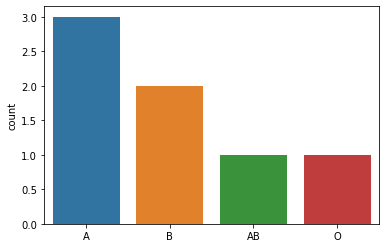

In [12]:
sns.countplot(x=blood)

In [11]:
x = [1, 1, 1, 2, 3, 5, 5, 7, 8, 9]

In [14]:
hist, edge = np.histogram(x, 4) # 구간별 빈도수 확인/ 구간별 빈도수, 구간

In [15]:
hist

array([4, 1, 2, 3], dtype=int64)

In [16]:
edge

array([1., 3., 5., 7., 9.])

In [23]:
# 중심경향치 : 자료의 중심이 되는 숫자 (평균, 중위수, 최빈수 등)
# - 무엇을 중심으로 모여있나(흩어져있나)
# 변산성측정치 : 자료가 흩어져 있는 정도를 나타낸 값
# - 모여있는 정도(흩어진 정도)

x = [100, 100, 200, 400, 500]

In [24]:
np.mean(x)

260.0

In [25]:
np.median(x) # 중위수

200.0

In [29]:
x = [1, 1, 2, 3, 3, 3, 4, 5, 5, 7]

In [33]:
# 범위(range) : 최대값과 최소값의 차이, 자료의 퍼짐 정도
np.min(x)
np.max(x)
np.max(x) - np.min(x)

6

In [26]:
# 중위수 : 명명척도에서 사용x, 서열/등간/비율척도에서 사용O

# 척도(scale) : 수집된 데이터의 수준
# 명명척도 : 혈액형(순서x, 연산x, 빈도수o)
# 서열척도 : 직급(사원,대리,과장,..., 순서o, 연산x, 빈도수o, 데이터 간격 일정치 않음)
# ex) 어린이, 청소년, 청년, 장년, 노년
# 등간척도 : 온도(순서o, 연산o, 영점의 기준이 임의적)
# ex)섭씨 20도는 섭씨 5도의 4배(수치상), 4배 따뜻하다?(아님)
# 비율척도 : 길이(등간척도 + 영점의 기준이 절대적(절대영점))
# ex)길이 20미터는 길이 5미터의 4배(수치상), 실제로도 4배 길다

In [27]:
from scipy.stats import mode

In [28]:
mode(x) # 최빈수, 최빈수의 빈도

ModeResult(mode=array([100]), count=array([2]))

In [34]:
# 분산 크다? 데이터가 평균에서 많이 벗어나 있다
# 분산 작다? 데이터가 평균 주변에 많이 있다

In [35]:
np.var(x) # 분산

3.2399999999999998

In [37]:
np.mean(x) # 3.4

3.4

In [44]:
x

[1, 1, 2, 3, 3, 3, 4, 5, 5, 7]

In [48]:
# 분산
summation = 0
for n in x:
    summation+=(n-np.mean(x))**2
summation/len(x)

3.2399999999999998

In [51]:
# 공분산
# 두 변수가 함께 변화하는 정도
# 공분산 > 0 : 두 변수가 같은 방향으로 변화
# 공분산 < 0 : 두 변수가 반대 방향으로 변화
# 공분산 = 0 : 두 변수가 독립(상관없음)

# 공분산의 크기가(절대값) 클 때 : 두 변수가 함께 많이 변화
# 공분산의 크기는 단위의 영향(ex: 키 cm/m) -> 절대적 크기로 판단x => -1 ~ +1 값으로 표준화
# => 표준화된값 : 상관계수

# 공분산은 선형적인 관계 측정, 비선형적인 관계는 측정하지 못함


# 상관계수
# 두 변수가 함께 변화하는 정도를 -1 ~ +1 사이로 나타낸 수
# 상관계수 = 공분산/ 각 변수의 표준편차의 곱 
# -1 <= 상관계수 <= +1

# 피어슨 상관계수 : 일반적인 상관계수
# 스피어만, 켄달, ... 상관계수

In [52]:
x = [8, 3, 6, 6, 9, 4, 3, 9, 3, 4] # 부모
y = [6, 2, 4, 6, 10, 5, 1, 8, 4, 5] # 자식

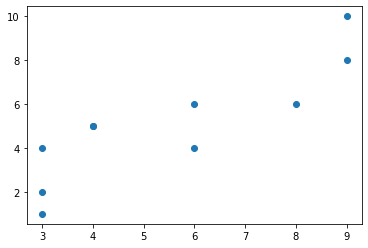

In [54]:
plt.plot(x, y, 'o')

In [56]:
np.cov(x,y)

array([[6.05555556, 5.61111111],
       [5.61111111, 6.98888889]])

In [58]:
np.cov(x,y)[0,1] # 공분산

5.611111111111111

In [59]:
z = [-3, -2, -1, 0, 1, 2, 3]
w = [9, 4, 1, 0, 1, 4, 9]

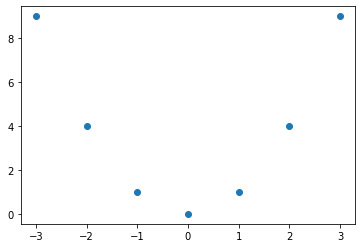

In [61]:
plt.plot(z,w,'o')

In [62]:
np.cov(z,w)[0,1]

0.0

In [63]:
x

[8, 3, 6, 6, 9, 4, 3, 9, 3, 4]

In [64]:
y

[6, 2, 4, 6, 10, 5, 1, 8, 4, 5]

In [66]:
np.corrcoef(x,y)[0,1] # 상관계수

0.862517279213578

In [69]:
# 공분산/(x의 표준편차 * y의표준편차)
np.cov(x,y)[0,1] # 공분산
xsd = np.std(x, ddof=1) # 표본표준편차
ysd = np.std(y, ddof=1)

In [70]:
np.cov(x,y)[0,1]/(xsd*ysd)

0.8625172792135779

In [71]:
# 3~12번열까지 총 10개 열에 해당되는 데이터를 추출하고
# 각 열에대한 이름을 a~j까지 열거된 이름으로 설정한다.

# a~j열까지 10개 열 상호간에 상관계수를 구했을 때, 
# 가장 상관계수가 높고 낮은 변수(features)들을 구하시오

In [93]:
medi = pd.read_csv('breast+cancer+wisconsin+diagnostic/wdbc.data', header=None).iloc[:, 2:12]
medi

,2,3,4,5,6,7,8,9,10,11
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [96]:
medi.columns=['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension']

In [97]:
medi

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [98]:
medi.iloc[0]

radius                 17.99000
texture                10.38000
perimeter             122.80000
area                 1001.00000
smoothness              0.11840
compactness             0.27760
concavity               0.30010
concave points          0.14710
symmetry                0.24190
fractal dimension       0.07871
Name: 0, dtype: float64

In [99]:
np.corrcoef(medi.iloc[0],medi.iloc[1])[0,1] # 상관계수

0.9997347978355419

In [108]:
res = {}
for i in range(len(medi.columns)):
    for j in range(i+1, len(medi.columns)):
        a1 = medi.columns[i]
        a2 = medi.columns[j]
        
        a3 = np.corrcoef(medi[a1], medi[a2])[0,1] # 상관계수
        
        res[(a1, a2)] = a3

max_res = max(res, key=res.get)
max_res

min_res = min(res, key=res.get)
min_res

('radius', 'fractal dimension')

In [110]:
df = pd.read_csv('breast+cancer+wisconsin+diagnostic/wdbc.data', header=None).iloc[:, 2:12]
df

df.columns = [
    'radius', 'texture', 'perimeter', 'area', 'smoothness', 
    'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension'
]

corr_arr = np.corrcoef(df, rowvar=False) # 상관계수 배열
corr_df = pd.DataFrame(corr_arr, index=df.columns, columns=df.columns) # 상관계수 프레임

descending_ser = corr_df.unstack().sort_values(ascending=False) # 내림차순
ascending_ser = corr_df.unstack().sort_values() # 오름차순

descending_ser[descending_ser < 0.999][0] # 1 미만 가장 큰 값
ascending_ser[0] # 가장 작은 값

-0.3116308263092902